In [46]:
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
#look at APPLE stock market
ticker = "AAPL"
start = dt.datetime(2019,1,1)

data = pdr.get_data_yahoo(ticker,start)

In [25]:
data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794


In [33]:
#look at average btwn rolling date
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

In [34]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA500,MA200,MA50
Date,,,,,,,,,,
2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.989998,121.313999,130.0084,115.152662,130.0084
2021-03-16,127.220001,124.720001,125.699997,125.570000,114740000.0,125.570000,121.358999,129.8660,115.383087,129.8660
2021-03-17,125.860001,122.339996,124.050003,124.760002,111437500.0,124.760002,121.628999,129.7730,115.604575,129.7730
2021-03-18,123.180000,120.320000,122.879997,120.529999,121229700.0,120.529999,121.668999,129.5634,115.803050,129.5634
2021-03-19,121.430000,119.680000,119.900002,119.989998,185023200.0,119.989998,121.525999,129.4312,115.996600,129.4312


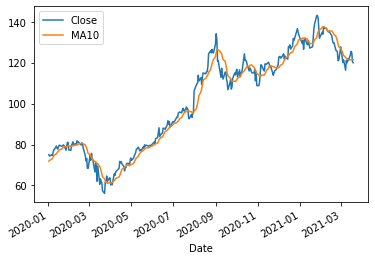

In [37]:
data[['Close','MA10']].loc['2020-01-01':].plot()


We can see above graph of closing and Moving Average of 10 days is that when the blue line above the orange , it tells that the stock is buying and when downward it is selling. There are lot of buying and selling throughout .

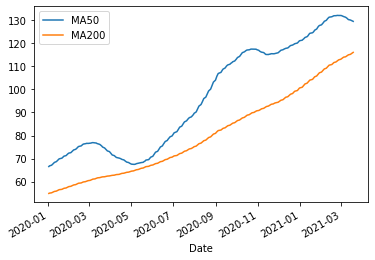

In [38]:
 data[['MA50','MA200']].loc['2020-01-01':].plot()


The MA200 is going upward and a small bump like between May2020 to June2020 cannot effect lot to the stock price

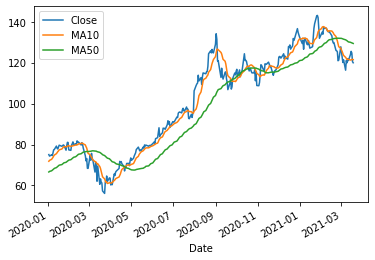

In [40]:
 data[['Close','MA10','MA50']].loc['2020-01-01':].plot()


In [51]:
#set new dataset since alot of empty from above
newdata = data.loc['2020-01-01':]
newdata.iloc[::-1]

,High,Low,Open,Close,Volume,Adj Close,MA10,MA500,MA200,MA50
Date,,,,,,,,,,
2021-03-19,121.430000,119.680000,119.900002,119.989998,185023200.0,119.989998,121.525999,129.43120,115.996600,129.43120
2021-03-18,123.180000,120.320000,122.879997,120.529999,121229700.0,120.529999,121.668999,129.56340,115.803050,129.56340
2021-03-17,125.860001,122.339996,124.050003,124.760002,111437500.0,124.760002,121.628999,129.77300,115.604575,129.77300
2021-03-16,127.220001,124.720001,125.699997,125.570000,114740000.0,125.570000,121.358999,129.86600,115.383087,129.86600
2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.989998,121.313999,130.00840,115.152662,130.00840
...,...,...,...,...,...,...,...,...,...,...
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,73.707749,67.70485,55.480125,67.70485
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,73.227999,67.42180,55.337062,67.42180
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,72.754249,67.14775,55.202887,67.14775


In [49]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 5.5MB/s 


In [56]:
#using excel writer module
import xlsxwriter

writer = pd.ExcelWriter("technical.xlsx",
                        engine='xlsxwriter',
                        date_format='yyyy-mm-dd',
                        datetime_format='yyyy-mm-dd')

sheet_name = 'Moving Average'
newdata[['Close','MA10','MA50']].to_excel(writer,sheet_name)

worksheet = writer.sheets[sheet_name]
workbook = writer.book

##-----------Format the cell inside excel----------------------
#create a format for a green cell
green_cell = workbook.add_format(
    {
        'bg_color': '#C6EFCE',
        'font_color': '#006100'
    }
)

#Create a format for a red cell
red_cell = workbook.add_format(
    {
        'bg_color': '#FFC7CE',
        'font_color': '#9C0006'
    }
)

#set column width of date column
worksheet.set_column(0,0,15)

for col in range(1, 4):
    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(newdata), col, {
        'type': 'formula',                                    
        'criteria': '=C2>=D2',
        'format': green_cell
    })

    # Create a conditional formatted of type formula
    worksheet.conditional_format(1, col, len(newdata), col, {
        'type': 'formula',                                    
        'criteria': '=C2<D2',
        'format': red_cell
    })
##----------End-------------------------------------------


##----Create graph inside excel-----------------------------
# Create a new chart object.
chart1 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart1.add_series({
        'name': "MA10",
        'categories': [sheet_name, 1, 0, len(newdata), 0],
        'values': [sheet_name, 1, 2, len(newdata), 2],
})

# Create a new chart object.
chart2 = workbook.add_chart({'type': 'line'})

# Add a series to the chart.
chart2.add_series({
        'name': 'MA50',
        'categories': [sheet_name, 1, 0, len(newdata), 0],
        'values': [sheet_name, 1, 3, len(newdata), 3],
})
##----- End --------------------------------------------------

# Combine and insert title, axis names
chart1.combine(chart2)
chart1.set_title({'name': sheet_name + " " + ticker})
chart1.set_x_axis({'name': 'Date'})
chart1.set_y_axis({'name': 'Price'})

# Insert the chart into the worksheet.
worksheet.insert_chart('F2', chart1)




writer.close()